# test notebook
## implementation of basic MLP neural network
firstly we import some libraries and define basic activation functions

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
import networks

specify the number of layers, number of neurons in each layer, and the activation function for each layer.

In [9]:
# example definition of a neural network
layers = [
    {'input_dim': 10, 'output_dim': 5, 'activation': 'relu'},
    {'input_dim': 5, 'output_dim': 2, 'activation': 'relu'},
    {'input_dim': 2, 'output_dim': 1, 'activation': 'sigmoid'}
]

load the desired datasets.

In [4]:
os.getcwd()

'd:\\studia\\sem6\\miowad\\miowad\\NN'

In [5]:

data_dir = Path("data")
square_simple_train = pd.read_csv(data_dir / "regression" / "square-simple-training.csv", index_col=0)
square_simple_test = pd.read_csv(data_dir / "regression" / "square-simple-test.csv", index_col=0)
steps_large_train = pd.read_csv(data_dir / "regression" / "steps-large-training.csv", index_col=0)
steps_large_test = pd.read_csv(data_dir / "regression" / "steps-large-test.csv", index_col=0)

In [14]:
square_simple_layers = [
    {'input_dim': 1, 'output_dim': 5, 'activation': 'sigmoid'},
    {'input_dim': 5, 'output_dim': 1, 'activation': 'linear'},

]

mlp = networks.MLP(square_simple_layers, square_simple_train[["x"]])
mlp.layers

In [16]:
mlp.layers[0].input_dim

1

In [17]:
X = square_simple_train["x"]
y = square_simple_train["y"]

y_hat = mlp.full_forward_pass(square_simple_train[['x']].T)

here I tried specyfing some parameters for the neural network by hand, but the results were not satisfying.

In [18]:
mlp.layers[0].weights = np.array([[3, -4, 1, 0, 0]]).reshape(5, 1)
mlp.layers[1].weights = np.array([[500, 400, 2, 0, 0]]).reshape(1, 5)

mlp.layers[0].bias = np.array([-5, -6, 0, 0, 0]).reshape(5, 1)
mlp.layers[1].bias = np.array([-130]).reshape(1, 1)

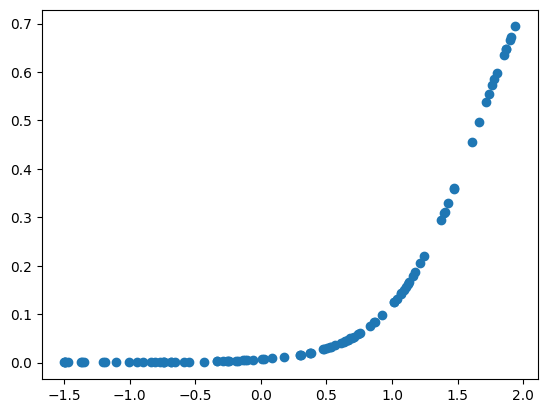

In [19]:
square_simple_train[["x"]].T.to_numpy()

plt.scatter(square_simple_train[["x"]].T.to_numpy(), mlp.layers[0].forward_pass(square_simple_train[["x"]].T.to_numpy())[0, :])

MSE of training data:  394.2290793766822


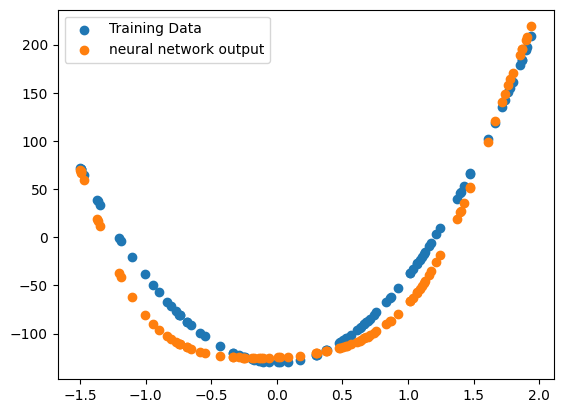

In [20]:
y_hat = mlp.full_forward_pass(square_simple_train[["x"]].T)
mse = np.mean((np.array(y_hat) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

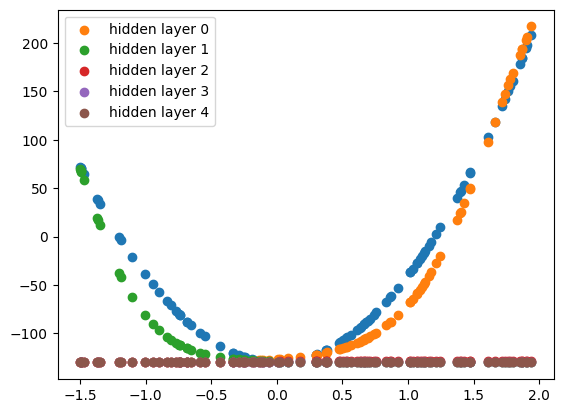

In [21]:


y_hat_single_layer = mlp.layers[0].forward_pass(square_simple_train[["x"]].T.to_numpy())
y_hat_single_layer_scaled = y_hat_single_layer * mlp.layers[1].weights.T + mlp.layers[1].bias

# plot the data
plt.scatter(square_simple_train.x, square_simple_train.y)
# plot all of the five columns from hidden_layer_scaled_outputs
for i in range(5):
    plt.scatter(square_simple_train.x, y_hat_single_layer_scaled[i], label=f'hidden layer {i}')
plt.legend()


I want to have a better control over all of the network parameters, so I will try to plot outputs of the hidden layer.

as it is visible we want to fit only three neurons as the output of the hidden layer. We will calculate the exact values we would need to fit the output of the hidden layer to the desired values.

MSE of training data:  1.1860115391971522


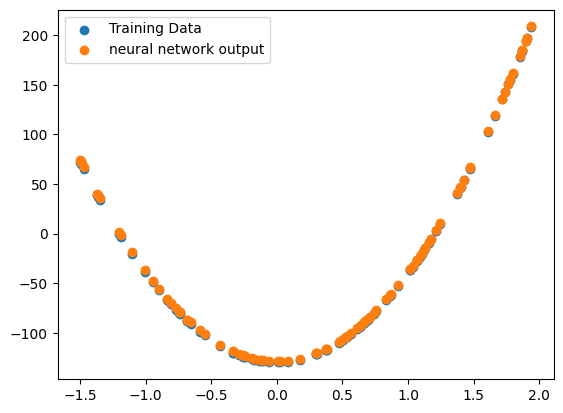

In [22]:
mlp.layers[0].weights = np.array([[0.219, 0.653, -0.747, 0, 0]]).reshape(5, 1)
mlp.layers[1].weights = np.array([[4169, -3899, -2572, 0, 0]]).reshape(1, 5)

mlp.layers[0].bias = np.array([1.815, 2.197, 2.645, 0, 0]).reshape(5, 1)
mlp.layers[1].bias = np.array([2196.5]).reshape(1, 1)


y_hat = mlp.full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

In [23]:
mse_test = np.mean((np.array(mlp.full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(square_simple_test.iloc[:, 1]))**2)
print("MSE of test data: ", mse_test)

MSE of test data:  1.3761319515785513


In [24]:
square_second_layers = [
    {'output_dim': 10, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

mlp = networks.MLP(square_second_layers, square_simple_train[["x"]].T.to_numpy())

MSE of training data:  1.1860115391971522


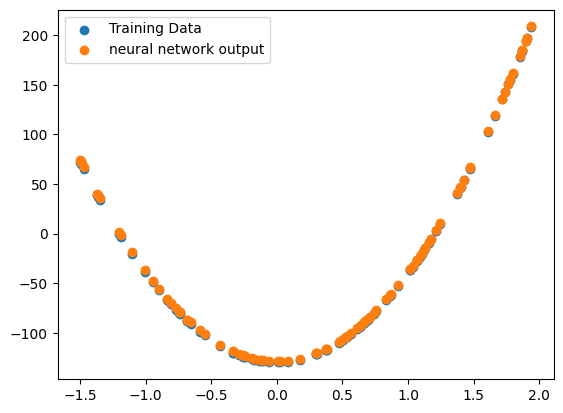

In [25]:

mlp.layers[0].weights = np.array([[0.219, 0.653, -0.747, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1)
mlp.layers[1].weights = np.array([[4169, -3899, -2572, 0, 0, 0, 0, 0, 0, 0]]).reshape(1, 10)

mlp.layers[0].bias = np.array([1.815, 2.197, 2.645, 0, 0, 0,0,0,0,0]).reshape(10, 1)
mlp.layers[1].bias = np.array([2196.5]).reshape(1, 1)

y_hat = mlp.full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(square_simple_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

In [26]:
test_mse = np.mean((np.array(mlp.full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(square_simple_test.iloc[:, 1]))**2)
test_mse

1.3761319515785513

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


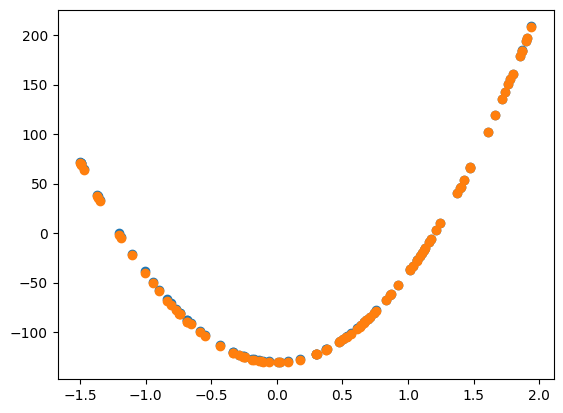

In [27]:
square_third_layers = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

mlp = networks.MLP(square_third_layers, square_simple_train[["x"]].T.to_numpy())


weights = [np.array([[0.54, -1830, -0.5, 0, 0]]).reshape(5, 1), np.array([[1, 0, 0,0,0], [0, 1, 0,0,0], [0, 0, 1,0,0], [0,0,0,0,0], [0,0,0,0,0]]).reshape(5,5), np.array([[-19118, 0.165, -23302,0,0]]).reshape(1, 5)]
biases = [np.array([[2.1, -2898, 2.24, 0, 0]]).reshape(5, 1), np.array([[0, 0, 0, 0, 0]]).reshape(5, 1), np.array([[30010]]).reshape(1, 1)]

for i in range(3):
    mlp.layers[i].weights = weights[i]
    mlp.layers[i].bias = biases[i]

y_hat = mlp.full_forward_pass(square_simple_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)

plt.scatter(square_simple_train.iloc[:, 0], square_simple_train.iloc[:, 1], label='Training Data')
plt.scatter(square_simple_train.iloc[:, 0], y_hat.flatten(), label='neural network output')


In [28]:
mse_test = np.mean((np.array(mlp.full_forward_pass(square_simple_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(square_simple_test.iloc[:, 1]))**2)
mse_test

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.8442456149923762

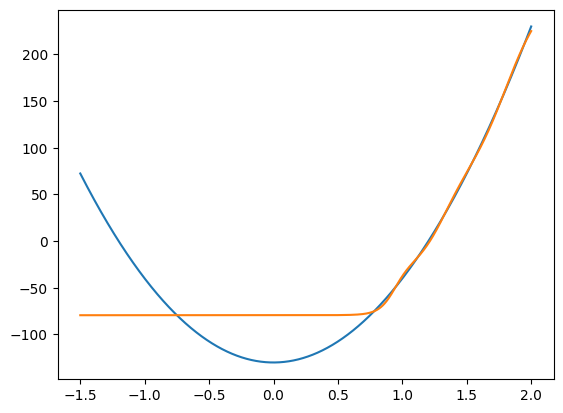

In [19]:
from scipy.optimize import minimize


def function(params, x):
    m = 3
    s = 0
    params = [params[i:i+m] for i in range(0, len(params), m)]
    for i in range(3):
        s += params[2][i] * networks.activations.sigmoid( networks.activations.sigmoid(params[0][i]*x + params[1][i])  )
    return s + params[3][0]

def objective(params, x, y):
    return np.mean((function(params, x) - y)**2)

def target(x):
    return 90*x**2 -130

x = np.linspace(-1.5, 2, 100000)
y = target(x)

init_params = np.random.randn(10)
result = minimize(objective, init_params, args=(x, y))
optimized_params = result.x

plt.plot(x, y, label='target')
plt.plot(x, function(optimized_params, x), label='optimized')

## steps dataset
quick peek at the steps dataset

          x   y
1 -1.481354 -80
2  1.033264  80
3 -0.076403   0
4 -1.419785 -80
5 -0.108398   0


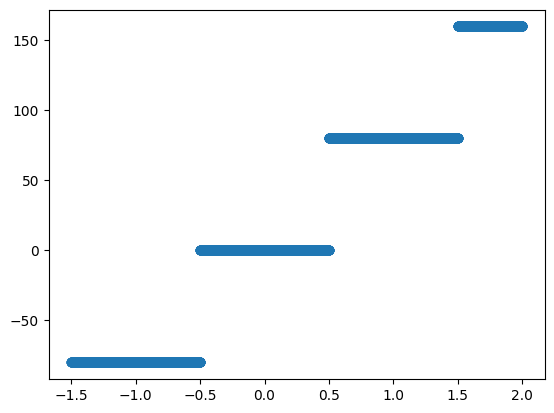

In [6]:
print(steps_large_train.head())
# plot the data
plt.scatter(steps_large_train.x, steps_large_train.y)

It is visible that the datasets consists of 4 linear steps.

we want to fit the data in a way, such that the most steeps parts of the sigmoid functions are between the steps.


In [9]:
steps_simple_layers = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'activation': 'linear'}    
]
weights = [np.array([[1, 0, 0, 0, 0]]).reshape(5, 1), np.array([[1, 1, 1, 1, 1]]).reshape(1, 5)]
biases = [np.array([[1, 0, 0, 0, 0]]).reshape(5, 1), np.array([[1]]).reshape(1, 1)]


mlp = networks.MLP(steps_simple_layers, steps_large_train[["x"]], weights, biases)
mlp.layers[1].weights

array([[1, 1, 1, 1, 1]])

MSE of training data:  7193.204590217444


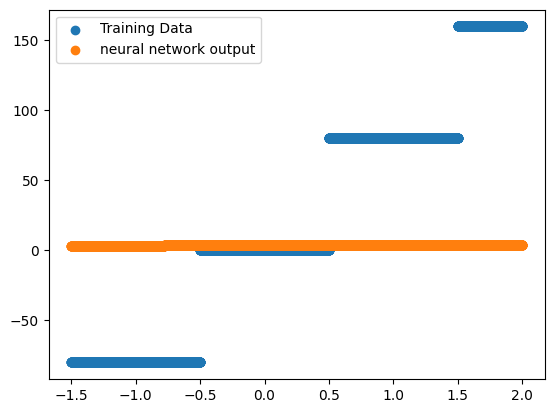

In [10]:
y_hat = mlp.full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE of training data:  2.090984203763538


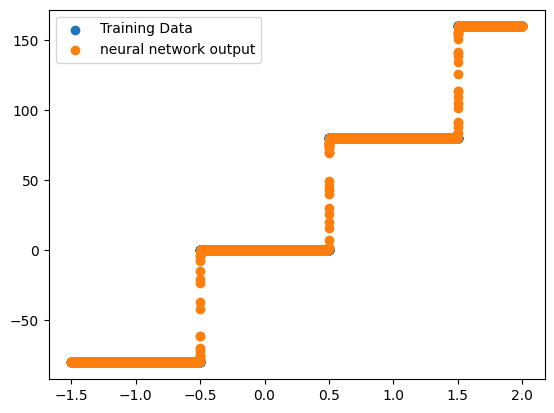

In [11]:

weights = [np.array([[1000, 1000, 1000, 0, 0]]).reshape(5, 1), np.array([[80, 80, 80, 0, 0]]).reshape(1, 5)]
biases = [np.array([[500, -500, -1500, 0, 0]]).reshape(5, 1), np.array([[-80]]).reshape(1, 1)]


mlp = networks.MLP(steps_simple_layers, steps_large_train[["x"]], weights, biases)
y_hat = mlp.full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

it looks quite well, now let's try to check the performance on the test dataset.

In [12]:
mse_test = np.mean((np.array(mlp.full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


2.755916962688831

very good performance. The same thing can be done for more number of neurons in the hidden layer, since we can make their weights equal to zero, it will be very similar.

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE of training data:  2.090984203763538


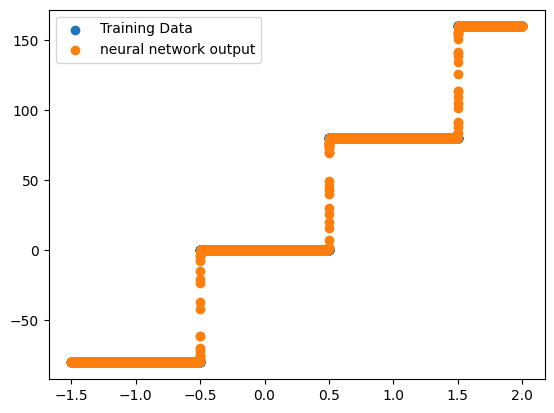

In [13]:
steps_second_layer = [
    {'output_dim': 10, 'activation': 'sigmoid'},
    {'activation': 'linear'}
]

weights = [np.array([[1000, 1000, 1000, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1), np.array([[80, 80, 80, 0, 0, 0, 0, 0, 0, 0]]).reshape(1, 10)]
biases = [np.array([[500, -500, -1500, 0, 0, 0, 0, 0, 0, 0]]).reshape(10, 1), np.array([[-80]]).reshape(1, 1)]

mlp = networks.MLP(steps_second_layer, steps_large_train[["x"]], weights, biases)


y_hat = mlp.full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0], y_hat.flatten(), label='neural network output')
plt.legend()
plt.show()

In [14]:
mse_test = np.mean((np.array(mlp.full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


2.755916962688831

and now the same thing but with two layers.

In [16]:
steps_third_layer = [
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 5, 'activation': 'sigmoid'},
    {'output_dim': 1, 'activation': 'linear'}
]


d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


MSE of training data:  0.5982612568644722


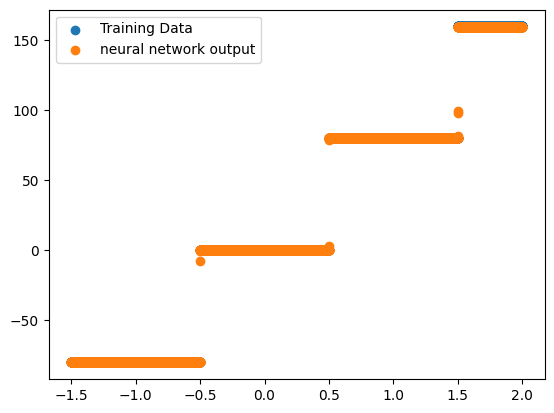

In [17]:

weights = [np.array([[10000, 10000, 10000, 0, 0]]).reshape(5, 1), np.array([[10, 0, 0,0,0], [0, 10, 0,0,0], [0, 0, 10,0,0], [0,0,0,0,0], [0,0,0,0,0]]).reshape(5,5), np.array([[160, 160, 160,0,0]]).reshape(1, 5)]
biases = [np.array([[5000, -5000, -15000, 0, 0]]).reshape(5, 1), np.array([[0, 0, 0, 0, 0]]).reshape(5, 1), np.array([[-320]]).reshape(1, 1)]

mlp = networks.MLP(steps_third_layer, steps_large_train[["x"]], 10*weights, biases)

y_hat = mlp.full_forward_pass(steps_large_train.iloc[:, 0].to_numpy().reshape(-1, 1).T)
mse = np.mean((np.array(y_hat) - np.array(steps_large_train.iloc[:, 1]))**2)
print("MSE of training data: ", mse)

plt.scatter(steps_large_train.iloc[:, 0], steps_large_train.iloc[:, 1], label='Training Data')
plt.scatter(steps_large_train.iloc[:, 0],  np.array(y_hat), label='neural network output')
plt.legend()
plt.show()

In [18]:
mse_test = np.mean((np.array(mlp.full_forward_pass(steps_large_test.iloc[:, 0].to_numpy().reshape(-1, 1).T)) - np.array(steps_large_test.iloc[:, 1]))**2)
mse_test

d:\studia\sem6\miowad\miowad\NN\networks\activations.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.5776671585750651